In [1]:
from vnpy.trader.setting import SETTINGS

SETTINGS["database.name"] = "clickhouse"
SETTINGS["database.database"] = "futures"
SETTINGS["database.host"] = "172.19.218.81"
SETTINGS["database.port"] = 9000
SETTINGS["database.user"] = "default"
SETTINGS["database.password"] = "vnpy1234"

In [6]:
from datetime import datetime
from importlib import reload

import pandas as pd
import plotly.express as px

from vnpy.trader.database import get_database
from vnpy.trader.constant import Exchange, Interval
from vnpy.trader.utility import extract_vt_symbol

from vnpy_ctastrategy.backtesting import BacktestingEngine, OptimizationSetting

import rumi_strategy
reload(rumi_strategy)
RumiStrategy = rumi_strategy.RumiStrategy

In [31]:
vt_symbol = "rb99.SHFE"
interval = "1m"
start = datetime(2010, 1, 1)
end = datetime.now()

In [32]:
engine = BacktestingEngine()

engine.set_parameters(
    vt_symbol=vt_symbol,
    interval=interval, 
    start=start, 
    end=end, 
    rate=0.0001,
    slippage=1, 
    size=10, 
    pricetick=1, 
    capital=1_000_000
)

setting = {
    "fast_window": 2,
    "slow_window": 55,
    "diff_window": 13
}
engine.add_strategy(RumiStrategy, setting)

2023-01-04 21:09:08.320142	开始加载历史数据
2023-01-04 21:09:08.320142	加载进度：# [0%]
2023-01-04 21:09:08.321175	加载进度：# [10%]
2023-01-04 21:09:08.322206	加载进度：## [20%]
2023-01-04 21:09:08.323238	加载进度：### [30%]
2023-01-04 21:09:08.324833	加载进度：#### [40%]
2023-01-04 21:09:08.326910	加载进度：##### [50%]
2023-01-04 21:09:08.328928	加载进度：###### [60%]
2023-01-04 21:09:08.331978	加载进度：####### [70%]
2023-01-04 21:09:08.335596	加载进度：######## [80%]
2023-01-04 21:09:08.338650	加载进度：######### [90%]
2023-01-04 21:09:08.342811	加载进度：########## [100%]
2023-01-04 21:09:08.370706	历史数据加载完成，数据量：969225
2023-01-04 21:09:08.375219	策略初始化完成
2023-01-04 21:09:08.375219	开始回放历史数据
2023-01-04 21:09:08.919356	回放进度：= [0%]
2023-01-04 21:09:09.399078	回放进度：== [10%]
2023-01-04 21:09:09.928488	回放进度：=== [20%]
2023-01-04 21:09:10.425361	回放进度：==== [30%]
2023-01-04 21:09:10.921800	回放进度：===== [40%]
2023-01-04 21:09:11.418556	回放进度：====== [50%]
2023-01-04 21:09:11.909212	回放进度：======= [60%]
2023-01-04 21:09:12.402313	回放进度：======== [70%]
2023-01-04 21:

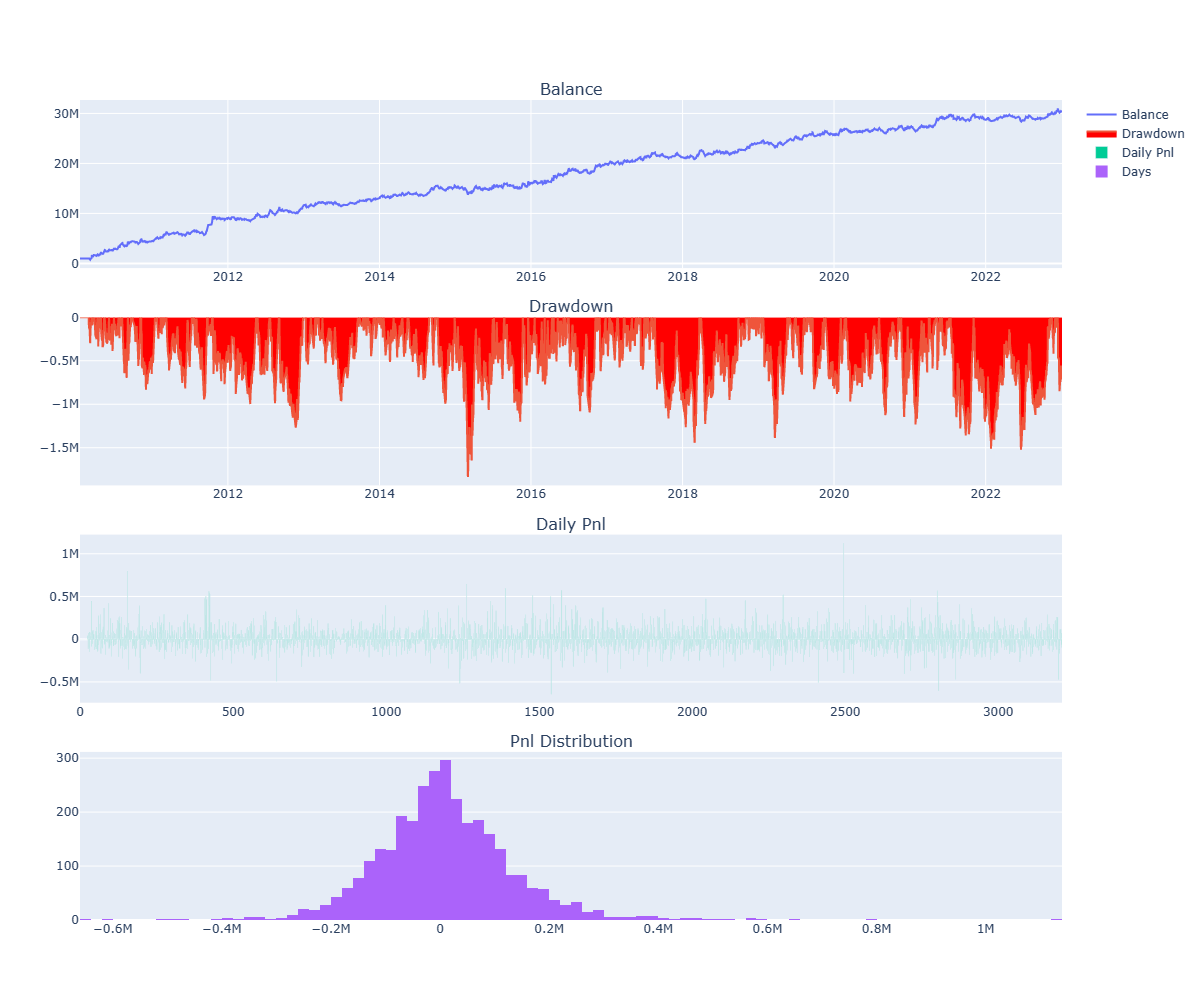

In [33]:
engine.load_data()
engine.run_backtesting()
engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [19]:
setting = OptimizationSetting()
setting.set_target("end_balance")
setting.add_parameter("fast_window", 2, 10, 1)
setting.add_parameter("slow_window", 40, 90, 5)
setting.add_parameter("diff_window", 5, 15, 1)

engine.run_bf_optimization(setting)

2023-01-04 20:34:36.646790	开始执行穷举算法优化
2023-01-04 20:34:36.646790	参数优化空间：1089


100%|██████████████████████████████████████████████████████████████████████████████| 1089/1089 [22:27<00:00,  1.24s/it]


2023-01-04 20:57:04.003701	穷举算法优化完成，耗时1347秒
2023-01-04 20:57:05.079725	参数：{'fast_window': 2, 'slow_window': 55, 'diff_window': 13}, 目标：11459041.210999995
2023-01-04 20:57:05.080746	参数：{'fast_window': 3, 'slow_window': 55, 'diff_window': 10}, 目标：11430149.107
2023-01-04 20:57:05.080746	参数：{'fast_window': 2, 'slow_window': 55, 'diff_window': 14}, 目标：11224549.007000003
2023-01-04 20:57:05.080746	参数：{'fast_window': 2, 'slow_window': 55, 'diff_window': 11}, 目标：11089854.52699999
2023-01-04 20:57:05.080746	参数：{'fast_window': 9, 'slow_window': 75, 'diff_window': 10}, 目标：11010263.813000008
2023-01-04 20:57:05.080746	参数：{'fast_window': 3, 'slow_window': 55, 'diff_window': 13}, 目标：10976674.190000007
2023-01-04 20:57:05.080746	参数：{'fast_window': 9, 'slow_window': 60, 'diff_window': 5}, 目标：10758675.035000004
2023-01-04 20:57:05.080746	参数：{'fast_window': 10, 'slow_window': 75, 'diff_window': 9}, 目标：10710640.958000025
2023-01-04 20:57:05.080746	参数：{'fast_window': 4, 'slow_window': 60, 'diff_window': 1

[("{'fast_window': 2, 'slow_window': 55, 'diff_window': 13}",
  11459041.210999995,
  {'start_date': datetime.date(2017, 1, 17),
   'end_date': datetime.date(2023, 1, 4),
   'total_days': 1451,
   'profit_days': 736,
   'loss_days': 707,
   'capital': 1000000,
   'end_balance': 11459041.210999995,
   'max_drawdown': -1521637.6600000076,
   'max_ddpercent': -42.926727792894816,
   'max_drawdown_duration': 228,
   'total_net_pnl': 10459041.21100001,
   'daily_net_pnl': 7208.160724328057,
   'total_commission': 0.0,
   'daily_commission': 0.0,
   'total_slippage': 1545130,
   'daily_slippage': 1064.8725017229497,
   'total_turnover': 5917932120.176001,
   'daily_turnover': 4078519.724449346,
   'total_trade_count': 677,
   'daily_trade_count': 0.4665747760165403,
   'total_return': 1045.9041210999994,
   'annual_return': 172.9958573838731,
   'daily_return': 0.168075743888695,
   'return_std': 3.0704593627618646,
   'sharpe_ratio': 0.8480223706941467,
   'return_drawdown_ratio': 24.364869

In [ ]:
db = get_database()

symbol, exchange = extract_vt_symbol(vt_symbol)

bars = db.load_bar_data(
    symbol=symbol,
    exchange=exchange,
    interval=Interval(interval),
    start=start,
    end=end
)

bars[0]

In [ ]:
df = pd.DataFrame.from_dict(bar.__dict__ for bar in bars)
df.set_index("datetime", inplace=True)
df.close_price.plot()